#  CNN training

<img src='cnn.PNG'>

In [12]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [7]:
model= Sequential()

# First CNN layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.output_shape

# Second CNN layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.output_shape

# Flatten layer
model.add(Flatten())
model.add(Dropout(0.5))
model.output_shape

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))
model.output_shape

# Final layer
model.add(Dense(2,activation='softmax'))
model.output_shape

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [14]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test= train_test_split(data,target,test_size=0.1)

In [15]:
X_train.shape

(1238, 100, 100, 1)

In [17]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(X_train,Y_train,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Train on 1114 samples, validate on 124 samples
Epoch 1/20
1114/1114 [==============================] - 69s 62ms/step - loss: 0.6540 - accuracy: 0.6122 - val_loss: 0.5929 - val_accuracy: 0.7177
Epoch 2/20
1114/1114 [==============================] - 73s 65ms/step - loss: 0.5042 - accuracy: 0.7567 - val_loss: 0.3512 - val_accuracy: 0.8790
Epoch 3/20
1114/1114 [==============================] - 80s 71ms/step - loss: 0.3137 - accuracy: 0.8600 - val_loss: 0.2560 - val_accuracy: 0.8790
Epoch 4/20
1114/1114 [==============================] - 80s 72ms/step - loss: 0.2155 - accuracy: 0.9201 - val_loss: 0.1655 - val_accuracy: 0.9355
Epoch 5/20
1114/1114 [==============================] - 80s 72ms/step - loss: 0.1720 - accuracy: 0.9327 - val_loss: 0.1581 - val_accuracy: 0.9435
Epoch 6/20
1114/1114 [==============================] - 74s 66ms/step - loss: 0.1121 - accuracy: 0.9641 - val_loss: 0.1127 - val_accuracy: 0.9597
Epoch 7/20
1114/1114 [==============================] - 72s 64ms/step - loss:

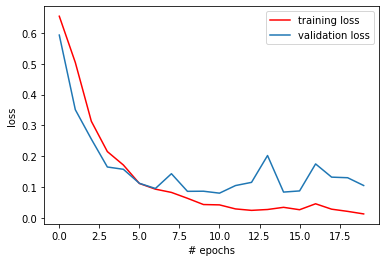

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

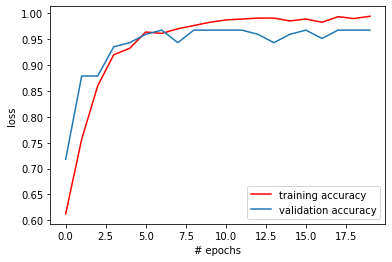

In [21]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
print(model.evaluate(x_test,y_test))


138/138 [==============================] - 2s 16ms/step
[0.12383587949949762, 0.9637681245803833]


In [24]:
model.save("my_model.model")